In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [14]:
# load dataset
data = pd.read_csv("./cleandata_one_hot_only.csv", header=0)
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            3656 non-null   bool   
 1   Gender_Male              3656 non-null   bool   
 2   education_graduate       3656 non-null   bool   
 3   education_postgraduate   3656 non-null   bool   
 4   education_primaryschool  3656 non-null   bool   
 5   education_uneducated     3656 non-null   bool   
 6   currentSmoker_0          3656 non-null   bool   
 7   currentSmoker_1          3656 non-null   bool   
 8   BPMeds_0.0               3656 non-null   bool   
 9   BPMeds_1.0               3656 non-null   bool   
 10  prevalentStroke_no       3656 non-null   bool   
 11  prevalentStroke_yes      3656 non-null   bool   
 12  prevalentHyp_0           3656 non-null   bool   
 13  prevalentHyp_1           3656 non-null   bool   
 14  diabetes_0              

In [15]:
X = data.drop('Heart_stroke', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            3656 non-null   bool   
 1   Gender_Male              3656 non-null   bool   
 2   education_graduate       3656 non-null   bool   
 3   education_postgraduate   3656 non-null   bool   
 4   education_primaryschool  3656 non-null   bool   
 5   education_uneducated     3656 non-null   bool   
 6   currentSmoker_0          3656 non-null   bool   
 7   currentSmoker_1          3656 non-null   bool   
 8   BPMeds_0.0               3656 non-null   bool   
 9   BPMeds_1.0               3656 non-null   bool   
 10  prevalentStroke_no       3656 non-null   bool   
 11  prevalentStroke_yes      3656 non-null   bool   
 12  prevalentHyp_0           3656 non-null   bool   
 13  prevalentHyp_1           3656 non-null   bool   
 14  diabetes_0              

In [16]:
y = data['Heart_stroke'] # Target variable
y.info()
nan_count = y.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.series.Series'>
RangeIndex: 3656 entries, 0 to 3655
Series name: Heart_stroke
Non-Null Count  Dtype
--------------  -----
3656 non-null   int64
dtypes: int64(1)
memory usage: 28.7 KB
Number of NaN values: 0


In [17]:
# smote = SMOTE(random_state=0)
# X_sampled, y_sampled = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model =OneVsRestClassifier(LogisticRegression( solver='lbfgs', max_iter=1000))
model.fit(X_train, y_train)
yhat = model.predict(X_test)


In [19]:
print(confusion_matrix(y_test, yhat))
print(accuracy_score(y_test, yhat))

[[913  10]
 [157  17]]
0.8477666362807658


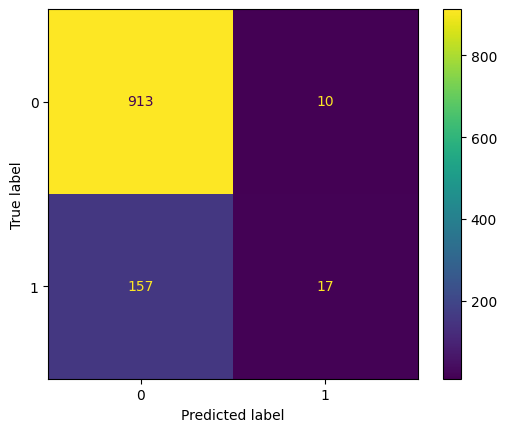

In [20]:
cm = confusion_matrix(y_test, yhat, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [21]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.63      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.74      0.54      0.54      1097
weighted avg       0.82      0.85      0.80      1097



In [24]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores
scores.mean()

0.853669436335055